# LogGabor user guide


Table of content
----------------

* [What is the LogGabor package?](LogGabor.ipynb#What-is-the-LogGabor-package?) 

* [Installing](LogGabor.ipynb#Install) 

* [Importing the library](LogGabor.ipynb#Importing-the-library)

* [Properties of log-Gabor filters](LogGabor.ipynb#Properties-of-log-Gabor-filters)

* [Testing filter generation](LogGabor_testing-filter-generation.ipynb) 

* [Testing on a sample image](LogGabor.ipynb#Testing-on-a-sample-image) 

* [Building a pyramid](LogGabor-making-a-pyramid.ipynb) 

* [An example of fitting images with log-Gabor filters](LogGabor_fit_example.ipynb) 

## What is the LogGabor package?

> Meanwhile biorthogonal wavelets got a very popular image processing tool, alternative multiresolution transforms have been proposed for solving some of their drawbacks, namely the poor selectivity in orientation and the lack of translation invariance due to the aliasing between subbands. These transforms are generally overcomplete and consequently offer huge degrees of freedom in their design. At the same time their optimization get a challenging task. We proposed here a log-Gabor wavelet transform gathering the excellent mathematical properties of the Gabor functions with a carefully construction to maintain the properties of the filters and to permit exact reconstruction. Two major improvements are proposed: first the highest frequency bands are covered by narrowly localized oriented filters. And second, all the frequency bands including the highest and lowest frequencies are uniformly covered so as exact reconstruction is achieved using the same filters in both the direct and the inverse transforms (which means that the transform is self-invertible). The transform is optimized not only mathematically but it also follows as much as possible the knowledge on the receptive field of the simple cells of the Primary Visual Cortex (V1) of primates and on the statistics of natural images. Compared to the state of the art, the log-Gabor wavelets show excellent behavior in their ability to segregate the image information (e.g. the contrast edges) from incoherent Gaussian noise by hard thresholding and to code the image features through a reduced set of coefficients with large magnitude. Such characteristics make the transform a promising tool for general image processing tasks.


Code: https://github.com/bicv/LogGabor

Reference (BibTex Format):

~~~~{.bibtex}
    @article{Fischer07cv,
        Author = {Fischer, Sylvain and Sroubek, Filip and Perrinet, Laurent U. and Redondo, Rafael and Crist{\'o}bal, Gabriel},
        Journal = {Int. Journal of Computional Vision},
        Keywords = {wavelet transforms, log-Gabor filters, oriented high-pass filters, image denoising, visual system},
        Title = {Self-invertible 2{D} log-{G}abor wavelets},
        Url = {http://invibe.net/LaurentPerrinet/Publications/Fischer07cv},
        Year = {2007}}
~~~~

<img src="http://invibe.net/cgi-bin/index.cgi/Figures/Fischer07cv/FigureUn?action=AttachFile&do=get&target=loggabor.png" alt="The log-Gabor transform compared to other multiresolution sche" width=100% >
**The log-Gabor transform compared to other multiresolution schemes.** *a.* Schematic contours of the log-Gabor filters implented in [Fischer (2007)](http://invibe.net/LaurentPerrinet/Publications/Fischer07cv) in the Fourier domain with 5 scales and 8 orientations (only the contours at 78% of the filter maximum are drawn). *b.* The real part of the corresponding filters is drawn in the spatial domain. The two first scales are drawn at the bottom magnified by a factor of 4 for a better visualization. The different scales are arranged in lines and the orientations in columns. The low-pass filter is drawn in the upper-left part. *c.* The corresponding imaginary parts of the filters are shown in the same arrangement. Note that the low-pass filter does not have imaginary part. Insets (b) and (c) show the final filters built through all the processes described in Section II. *d.* In the proposed scheme the elongation of log-Gabor wavelets increases with the number of orientations nt . Here the real parts (left column) and imaginary parts (right column) are drawn for the 3, 4, 6, 8, 10, 12 and 16 orientation schemes. *e.* As a comparison orthogonal wavelet filters ’Db4’ are shown. Horizontal, vertical and diagonal wavelets are arranged on columns (low-pass on top). *f.* As a second comparison, steerable pyramid filters [30] are shown. The arrangement over scales and orientations is the same as for the log-Gabor scheme.

<img src="http://invibe.net/cgi-bin/index.cgi/Figures/Perrinet08spie/FigureDeux?action=AttachFile&do=get&target=GoldenPyramid.png" alt="The log-Gabor transform compared to other multiresolution sche" width=100% >
**The Golden Laplacian Pyramid with log-Gabor filters.** To represent the edges of the image at different levels and orientations, we use a multi-scale approach constructing a set of filters of different scales and according to oriented log-Gabor filters. This is represented here by stacking images on a Golden Rectangle [Perrinet (2008)](http://invibe.net/LaurentPerrinet/Publications/Perrinet2008spie), that is where the aspect ratio is the golden section $\phi = \frac{1+\sqrt{5}}{2}$. The level represents coefficients' amplitude, hue corresponds to orientation. We present here the base image on the left and the successive levels of the pyramid in a clockwise fashion (for clarity, we stopped at level $8$). Note that here we also use $\phi^2$ (that is $\phi+1$) as the down-scaling factor so that the pixelwise resolution of the pyramid images correspond across scales.

[Back to the LogGabor user guide](LogGabor.ipynb#LogGabor-user-guide)

## Install

To install them, use pip:

    pip3 install LogGabor

This will install the necessary requirements :

* numpy
* NeuroTools
* SLIP
* matplotlib

More info and the whole source code may be found @ https://github.com/bicv/LogGabor.

### Installing notebook dependencies

To run this notebook, you obviously need jupyter (aka ipython), but also https://github.com/ioam/holoviews for the nice visualization. In short, you need to


```
pip3 install -r requirements.txt
```

[Back to top](#LogGabor-user-guide)

## Importing the library

In [1]:
%load_ext autoreload
%autoreload 2
from LogGabor import LogGabor
parameterfile = 'https://raw.githubusercontent.com/bicv/LogGabor/master/default_param.py'
lg = LogGabor(parameterfile)

In [2]:
help(LogGabor)

Help on class LogGabor in module LogGabor.LogGabor:

class LogGabor(SLIP.SLIP.Image)
 |  Defines a LogGabor framework by defining a ``loggabor`` function which return the envelope of a log-Gabor filter.
 |  
 |  Its envelope is equivalent to a log-normal probability distribution on the frequency axis, and von-mises on the radial axis.
 |  
 |  Method resolution order:
 |      LogGabor
 |      SLIP.SLIP.Image
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, pe)
 |      Initializes the Image class
 |      
 |      May take as input:
 |      
 |      - a dictionary containing parameters
 |      - a ``ndarray`` (dimensions ``N_X`` and ``N_Y`` are guessed from this array)
 |      - a string representing a file or URL pointing to an image file
 |      - a string pointing to  a file or URL containing a dictionary of parameters (or simply the name of the file)
 |      - a ``NeuroTools.parameters.ParameterSet`` object containing parameters
 |      
 |      Paramete

To install the dependencies related to running this notebook, see [Installing notebook dependencies](#Installing-notebook-dependencies).

[Back to top](#LogGabor-user-guide)

## Properties of log-Gabor filters

### Gabor filters

An important task in image processing and related areas (such as understanding principles of vision)  involves defining a dictionary of templates (or
filters) for detecting edges. This representation should give a generic model of edges parameterized by their shape, orientation, and scale. Moreover the range of these parameters should match with what has been reported for simple-cell responses in macaque primary visual cortex (V1). As such,  standard Gabors are classically used as they are well fitted to V1 simple cells (Daugman, 1980).

Firstly proposed by Dennis Gabor in 1946, the canonical coherent states of the Gabor filters are different versions of a Gaussian-shaped window shifted in time/space and frequency variables. Subsequently Morlet brought them into the wavelet multi-resolution framework and they are called Gabor wavelets as well. Belonging to the large Cohen's class, Gabor's work synthesizes the studies of Nyquist in Communication Theory in 1924 and Heisenberg in Quantum Mechanics in 1927, by which he proposed the Gaussian shape as an optimal envelope for time-frequency representation because it turns the uncertainly principle from inequality into equality.

Some important characteristics of Gabor wavelets are: 

1. the Gabor transform is obtained through a linear convolution, 
1. it may enable complete image recovery, 
1. the transform domain contains fully the energy of the signal (Parseval's theorem), 1. it is not orthogonal but an unconditional basis, a frame, 
1. the Fourier plane is symmetric and 
1. it is invariant to shifting in time/space, frequency and scale. 
1. Gabor filters are completely symmetric of both sides (isotropy), monomodal and centered (localization) and smooth and infinitely derivable (regularity). 
1. In the case of bidimensional signals (images), the scaled versions even can be rotated. The result is the partition of the Fourier plane into bands modulated in frequency and orientation which discriminate spectral features in multiples directions. In contrast, (bi-)orthogonal wavelets often have well-known difficulties in implementing more than three orientations (horizontal, vertical and diagonal). 
1. In addition, the Gaussian envelop is modulated by a complex exponential with odd and even phases, which is effective for analyzing features with different phases as abrupt impulses or steps, i.e. ridges and edges in 2D respectively. The filter results of a symmetric and an antisymmetric filter can be combined in a single complex number whose squared amplitude is called the Gabor-energy. This activity relates to the response of so-called complex cells in the primary visual cortex (see H. Spitzer and S. Hochstein. A complex-cell receptive-field model. *Journal of Neuroscience, 53(5):1266–1286, 1985*).

See https://en.wikipedia.org/wiki/Gabor_filter for more information.


### log-Gabor filters


Gabor filters are a traditional choice for obtaining localised frequency information. It is worth stressing here other important aspects in that peculiar shape. Despite its Gaussian shape spreads to infinite, it decays rapidly from its center. They offer the best simultaneous localization of spatial and frequency information. However they have two main limitations. The maximum bandwidth of a Gabor filter is limited to approximately one octave and Gabor filters are not optimal if one is seeking broad spectral information with maximal spatial localization.




These limitations are well illustrated by focusing on the DC component. Indeed, one cannot construct Gabor functions of arbitrarily wide bandwidth and still maintain a reasonably small DC component in the even-symmetric filter. This difficulty can be seen if we look at the transfer function of an even-symmetric Gabor filter in the frequency domain. The transfer function is the sum of two Gaussians centred at plus and minus the centre frequency. If the standard deviation of these Gaussians becomes more than about one third of the centre frequency the tails of the two Gaussians will start to overlap excessively at the origin, resulting in a nonzero DC component.
Transfer function of a high bandwidth even-symmetric Gabor filter. The two Gaussians that make up the function overlap at the origin, resulting in a significant DC component.

An alternative to the Gabor function is the Log-Gabor function proposed by Field [1987]. Log-Gabor filters can be constructed with arbitrary bandwidth and the bandwidth can be optimised to produce a filter with minimal spatial extent. 
We use a log-Gabor representation, which is well suited to represent
a wide range of natural images~\citep{Fischer07}.
Like Gabors, these filters are defined by Gaussians in Fourier space,
but their specificity is that log-Gabors have Gaussians envelopes in log-polar frequency space.
This is consistent with physiological measurements which indicate that V1 cell responses are symmetric on the log frequency scale.
They have multiple advantages over Gaussians:
In particular, they have no DC component,
and more generally, their envelopes more broadly cover the frequency space~\citep{Fischer07cv}.
In this chapter, we set the bandwidth of the Fourier representation of the filters
to $1$ and $\pi/8$ respectively in the log-frequency and polar coordinates
to get a family of relatively elongated (and thus selective) filters
(see~\citet{Fischer07cv} and sigure above for examples of such edges).
Prior to the analysis of each image, we used the spectral whitening filter
described by~\citet{Olshausen97} to provide
a good balance of the energy of output coefficients~\citep{Perrinet03ieee,Fischer07}.
Such a representation is implemented in this package.






 * see this excellent presentation of log-Gabor filters: http://www.csse.uwa.edu.au/~pk/research/matlabfns/PhaseCongruency/Docs/convexpl.html
 * see more articles using Log-Gabor filters: http://www.citeulike.org/tag/log-gabor


What do log Gabor functions look like in the spatial domain? Unfortunately due to the singularity in the log function at the origin one cannot construct an analytic expression for the shape of the log Gabor function in the spatial domain. One is reduced to designing the filters in the frequency domain and then performing a numerical inverse Fourier Transform to see what they look like. Their appearance is similar to Gabor functions though their shape becomes much "sharper" as the bandwidth is increased. The shapes of log Gabor and Gabor functions are almost identical for bandwidths less than one octave. 	


[Back to top](#LogGabor-user-guide)

## testing coordinates in Fourier space

In [3]:
import holoviews as hv
#hv.notebook_extension('bokeh')
%load_ext holoviews.ipython
%output size=150 dpi=120
%load_ext autoreload
%autoreload 2
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
fig_width = 12
figsize=(fig_width, .618*fig_width)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Defining input image as Lena:

In [4]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [5]:
from LogGabor import imread
image = imread('https://github.com/bicv/SLIP/raw/master/database/yelmo512.png')
print('Mean intensity: ', image.mean(), ' - standard deviation: ', image.std())

Mean intensity:  0.53464906919  - standard deviation:  0.220459088468


Defining image processing framework by creating a ``LogGabor`` object:

In [6]:
lg = LogGabor(parameterfile)
lg.set_size(image)


Rectifying image:

In [7]:
image = lg.normalize(image, center=True)
print('Mean intensity: ', image.mean(), ' - standard deviation: ', image.std())

Mean intensity:  -2.12967983786e-08  - standard deviation:  0.367204255829


[Back to top](#LogGabor-user-guide)

## Testing on a sample image

In [8]:
lg = LogGabor(parameterfile)
image = imread('https://github.com/bicv/SLIP/raw/master/database/yelmo512.png')
lg.set_size(image)
lg.pe.datapath = 'database/'
print(lg.pe)

{'N_image': 100, 'seed': None, 'N_X': 512, 'N_Y': 512, 'noise': 0.1, 'do_mask': True, 'mask_exponent': 3.0, 'do_whitening': True, 'white_name_database': 'kodakdb', 'white_n_learning': 0, 'white_N': 0.07, 'white_N_0': 0.0, 'white_f_0': 0.4, 'white_alpha': 1.4, 'white_steepness': 4.0, 'white_recompute': False, 'base_levels': 1.618, 'n_theta': 24, 'B_sf': 0.4, 'B_theta': 0.17453277777777776, 'd_width': 45.0, 'd_min': 0.25, 'd_max': 2.0, 'N_r': 6, 'N_Dtheta': 24, 'N_phi': 12, 'N_scale': 5, 'loglevel_max': 7, 'use_cache': True, 'figpath': 'results', 'edgefigpath': 'results/edges', 'matpath': 'data_cache', 'edgematpath': 'data_cache/edges', 'datapath': 'database/', 'ext': '.pdf', 'figsize': 14.0, 'formats': ['pdf', 'svg', 'jpg'], 'dpi': 450, 'verbose': 0}


:Image   [x,y]   (z)
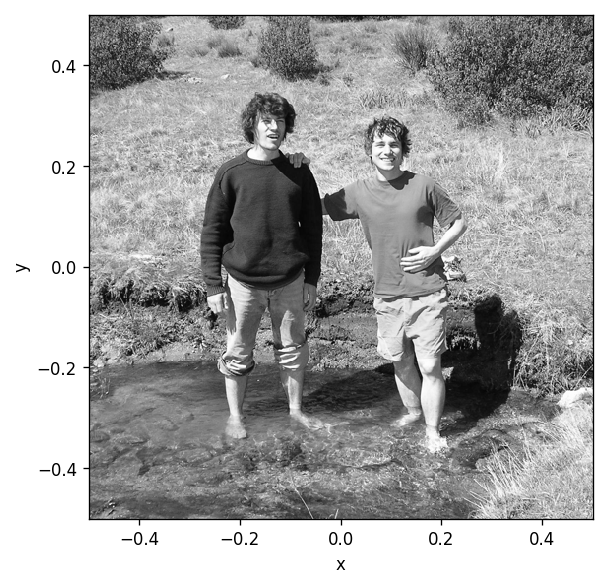

In [9]:
%%opts Image (cmap='gray') 
hv.Image(image)

:Image   [x,y]   (z)
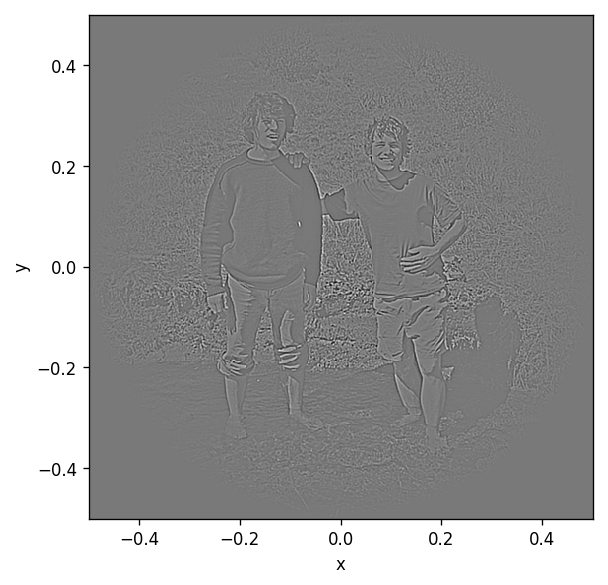

In [10]:
%%opts Image (cmap='gray') 
image = lg.whitening(image)*lg.mask
hv.Image(image)

In [11]:
%opts Image.Phase_domain (cmap='hsv')
%opts Image.Amplitude_domain (cmap='hot')

In [12]:
#! a function to explore these parameters:
def filter_explore(image, param_name, param_range, verb=False, angle=False, movie=True):
    if movie:
        amp_map, phase_map = hv.HoloMap(), hv.HoloMap()
    else:
        ims = []
    for param_ in param_range:
        if angle:
            title = np.str(param_*180/np.pi) + r'$^0$'
        else:
            title = np.str(param_)
        if param_name=='phase':
            FT_phase = np.exp(-1j*param_)
            params_=params.copy()
        else:
            FT_phase = 1
            params_=params.copy()
            params_.update({param_name:param_})
        FT_lg = lg.loggabor(0, 0, **params_)
        im_ = lg.FTfilter(image, FT_lg, full=True)
        
        amp = hv.Image(lg.normalize(np.absolute(im_), center=False), 
                    group='Amplitude domain',
                    key_dimensions=[r'$f_x$', r'$f_y$'],
                    value_dimensions=[hv.Dimension('Amplitude', range=(0,1))])
        phase = hv.Image(np.angle(im_)/np.pi,
                    group='Phase domain',
                    key_dimensions=[r'$x$', r'$y$'],
                    value_dimensions=[hv.Dimension('Phase', range=(-1,1))])
        if movie:
            amp_map[param_] = amp
            phase_map[param_] = phase
        else:
            ims.append((amp+phase))
    if movie:
        return amp_map + phase_map
    else:
        return np.sum(sv).cols(2)

In [13]:
#! explore parameters of LogGabors on the filtering:
filter_explore(image, param_name='theta', param_range=lg.theta)

NameError: name 'params' is not defined

In [ ]:
filter_explore(image, param_name='B_theta', param_range=lg.pe.B_theta*np.logspace(-.3, .2, 6))

In [ ]:
filter_explore(image, param_name='sf_0', param_range=lg.sf_0, verb=True)

In [ ]:
filter_explore(image, param_name='B_sf', param_range=lg.pe.B_sf*np.logspace(-.6, .6, 9))

[Back to top](#LogGabor-user-guide)

## more book keeping

In [ ]:
%load_ext watermark
%watermark

In [ ]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, SLIP, LogGabor

[Back to top](#LogGabor-user-guide)